<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">MACHINE LEARNING</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détection de faux billets
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Analyse Exploratoire </h2>
</div>

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Importation des librairies</h3>
</div>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,adjusted_rand_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [62]:
df = pd.read_csv("billets.csv",sep =";")

In [63]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [64]:
df.shape

(1500, 7)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [66]:
# Vérification de valeurs nulles
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [67]:
# Vérification de valeurs dupliquées
df.duplicated().sum()

np.int64(0)

Cette première partie de l'exploration des données montre que la totalité des variables explicatives est de type float donc des nombres décimaux. Aussi ,nous notons l'existence de valeurs nulles dans la variable "margin_low".Néanmoins,il n'existe pas de valeurs dupliquées dans les données.

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Statistiques sur les dimensions</h3>
</div>

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [69]:
    # Statistiques descriptives

colonnes = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

for colonne in colonnes:
        print(f"Statistiques de '{colonne}':")
        print(df.groupby("is_genuine")[colonne].describe())


Statistiques de 'diagonal':
             count       mean       std     min     25%     50%       75%  \
is_genuine                                                                  
False        500.0  171.90116  0.306861  171.04  171.69  171.91  172.0925   
True        1000.0  171.98708  0.300441  171.04  171.79  171.99  172.2000   

               max  
is_genuine          
False       173.01  
True        172.92  
Statistiques de 'height_left':
             count       mean       std     min     25%     50%       75%  \
is_genuine                                                                  
False        500.0  104.19034  0.223758  103.51  104.04  104.18  104.3325   
True        1000.0  103.94913  0.300231  103.14  103.74  103.95  104.1400   

               max  
is_genuine          
False       104.88  
True        104.86  
Statistiques de 'height_right':
             count       mean       std     min     25%     50%     75%  \
is_genuine                                      

L'analyse des différentes statistiques sur les dimensions attire l'attention sur plusieurs faits :
 - Lorsqu'on prend la dimension "diagonal",on remarque la diagonale moyenne pour les faux billets (171,90) est approximativement égale à celle des vrais billets (171,98).La diagonale ne diffère pas tellement entre les deux types de billets.
  - Quant aux dimensions "height_left","height_right" on remarque les valeurs moyennes varient souvent entre 103 et 104 lorsqu'on passe d'un type de billet à un autre .On note ainsi une différence minimale entre les deux classes de billets en se basant sur ces dimensions
  - les valeurs moyennes de margin_low varient entre 5 et 4 lorsqu'on passe des faux billets aux vrais billets. On note donc une différence remarquable en se basant sur cette dimension
  les valeurs moyennes de margin_up varient entre 3.35 et 3.05 lorsqu'on passe des faux billets aux vrais billets. On note donc une certaine différence  en se basant sur cette dimension
  -Length permet clairement une bonne distinction .En effet, on peut remarquer que les valeurs moyenne de "length" varient notamment entre 111 et 113.


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Répartition vrais billets/faux billets</h3>
</div>

In [70]:
df["is_genuine"].value_counts(normalize = True)

is_genuine
True     0.666667
False    0.333333
Name: proportion, dtype: float64

Les données contiennent 66,66 % de vrais billets et 33,33 % de faux billets-.Cette répartition montre qu'il y a plus de vrais billets que de faux billets.

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Nettoyage des données</h3>
</div>

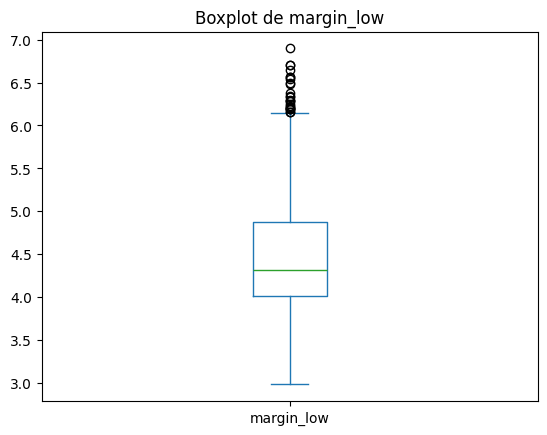

In [71]:
# Boxplot pour voir la presence ou non de Outliers

df["margin_low"].plot(kind ="box")
plt.title("Boxplot de margin_low")
plt.show()

L'analyse de ce boxplot nous permet de voir que la variable explicative "margin_low" contient des Outliers.
Les valeurs manquantes seront donc imputées en utilisant la médiane de cette colonne

In [72]:
# Déterminaton du nombre d'Outliers

Q1 = df["margin_low"].quantile(0.25)
Q3 = df["margin_low"].quantile(0.75)
IQR = Q3 - Q1

# Valeurs aberrantes
outliers = df[(df["margin_low"] < Q1 - 1.5 * IQR) | (df["margin_low"] > Q3 + 1.5 * IQR)]
print(f"Nombre d'outliers : {len(outliers)}")




Nombre d'outliers : 24


Vue la présence d'Outliers dans la variable "Margin_low",l'imputation des valeurs manquantes se fera par la médiane de cette dimension.

In [73]:
# Remplacement des valeurs manquantes de margin_low par la médiane

df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())

In [74]:
# verification

df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Visualisation des données</h3>
</div>

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Analyse univariée</h3>
</div>

<Axes: xlabel='is_genuine', ylabel='count'>

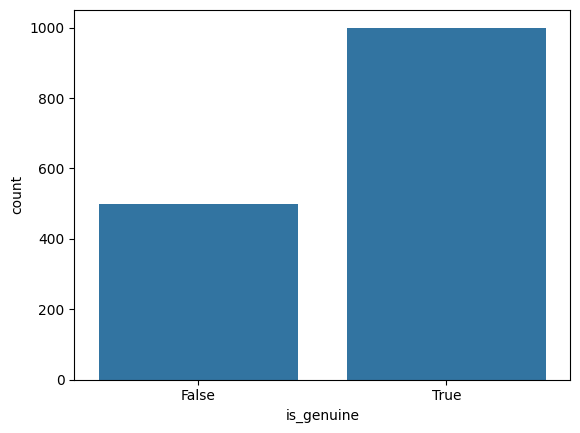

In [75]:
# Répartition de la variable cible "is_genuine"

sns.countplot(data = df,x= "is_genuine")

Ce graphique permet de remarquer qu'il y a un plus grand nombre de  vrais billets que de faux billets dans la dataframe. Ce qui laisse place à un léger déséquilibre de classes.
Ce déséquilibre sera donc pris en compte pour la suite.

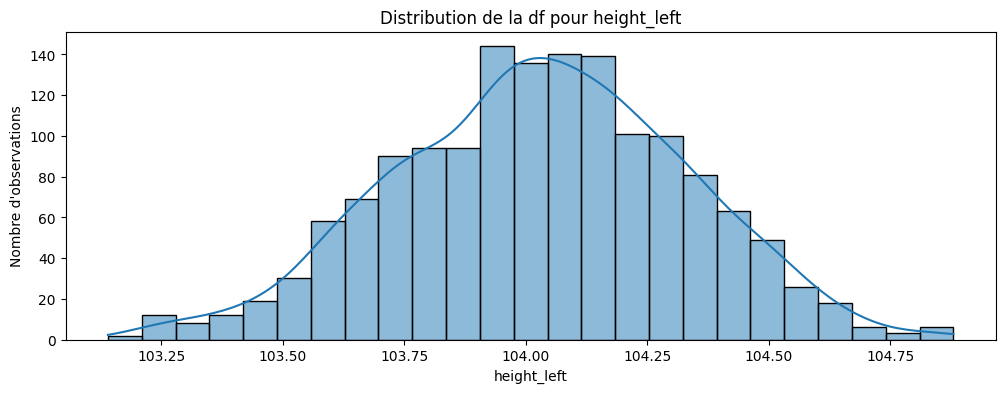

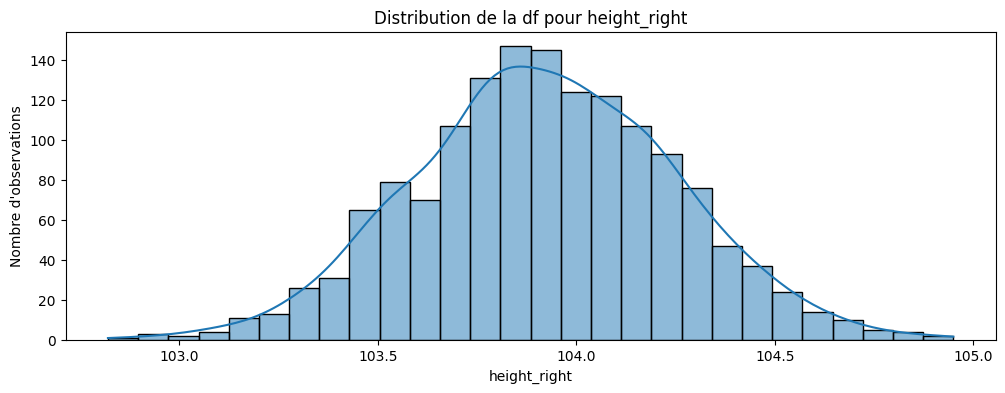

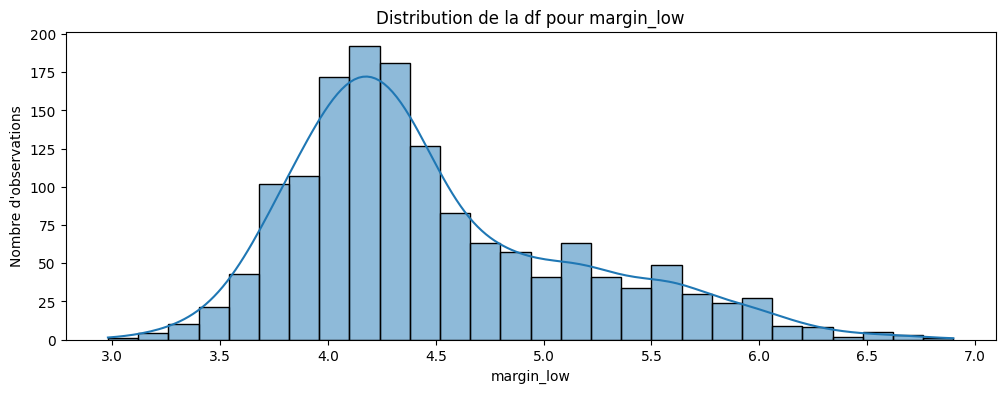

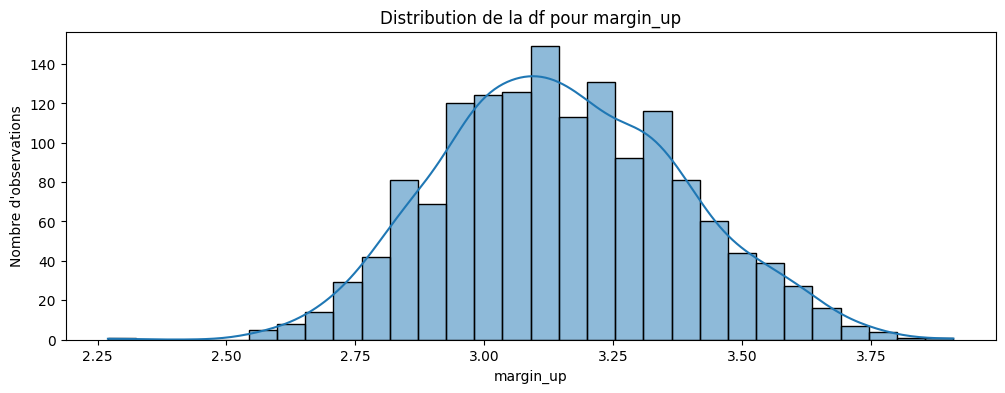

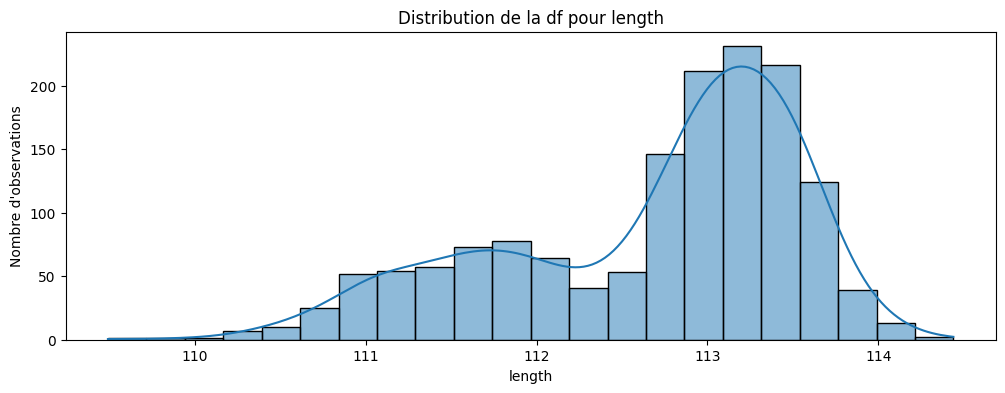

In [76]:
# Distribution de chaque colonne de la df

for col in df.columns[2:]:
    fig, ax = plt.subplots(1,1,figsize=(12,4))
    sns.histplot(data=df, x=col,kde = True)
    plt.title(f"Distribution de la df pour {col}")
    plt.ylabel("Nombre d'observations")
    plt.show()

L'analyse de ces graphiques permet de voir sur quelles plages numériques les dimensions des billets évoluent.
En effet, on pet constater que : 
 "height_left" varie entre 103.25 et 104.75;
 "height_right" varie entre 103 et 105;
 "margin_low" varie entre 3.0 et 7.0;
 "margin_up" varie entre 2.25 et 3.75;
 "length" varie entre 110 et 114.
 Cette analyse nous permet donc de constater l'écart entre certaines valeurs des différentes colonnes de la dataframe.
 Une normalisation est donc nécessaire .

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Analyse bivariée</h3>
</div>

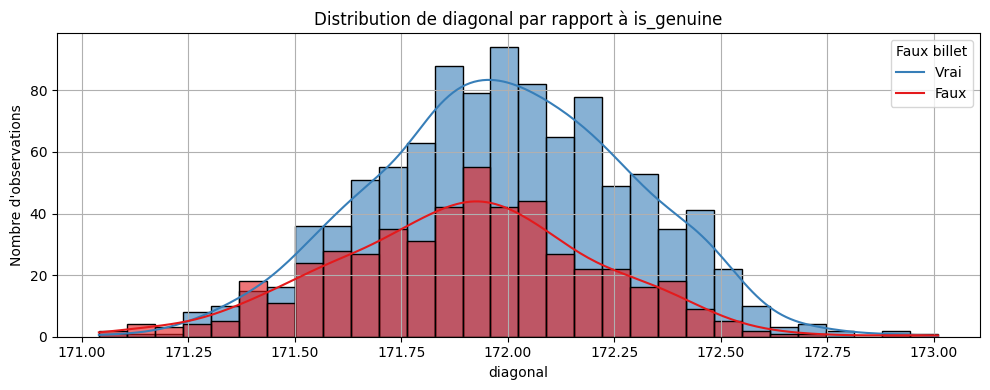

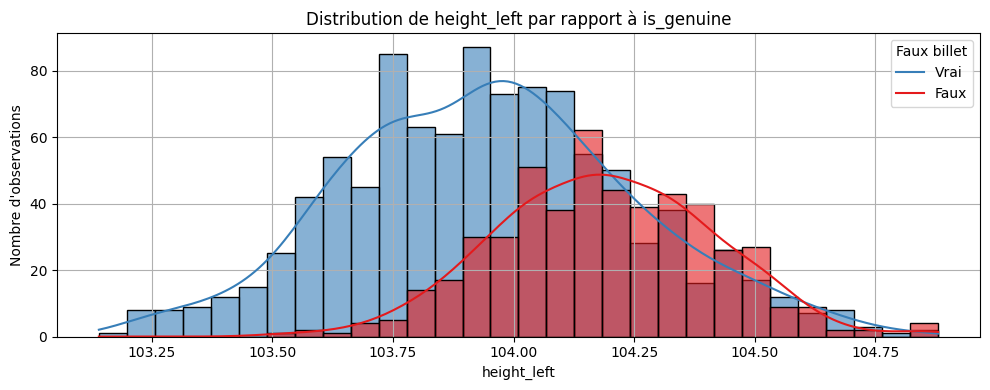

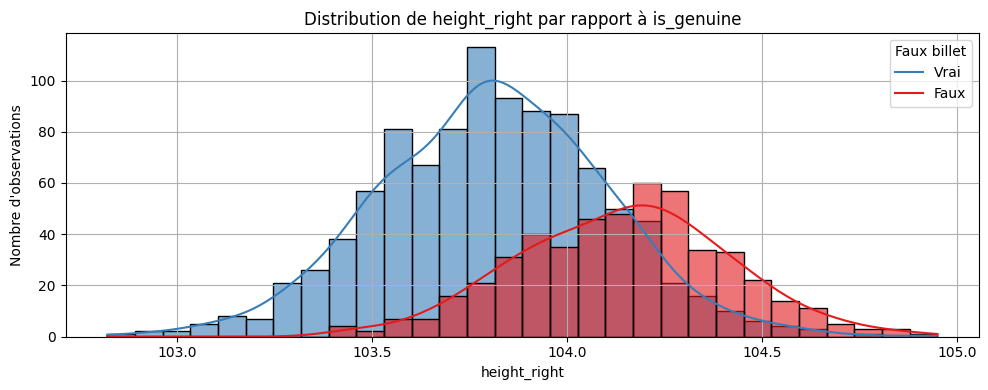

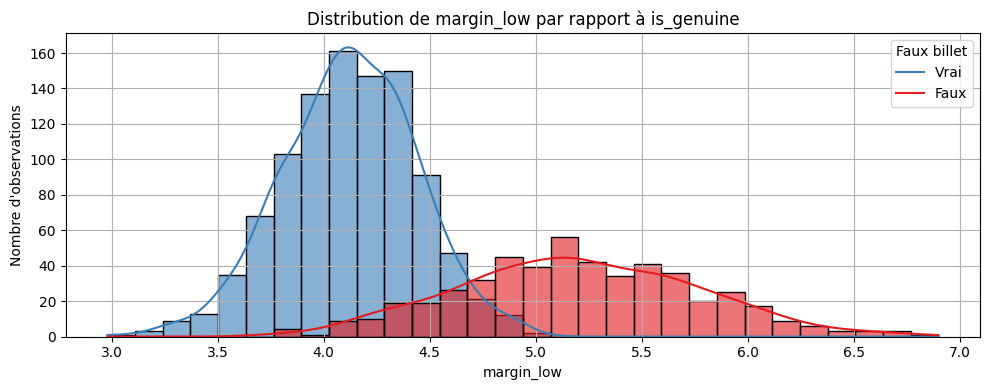

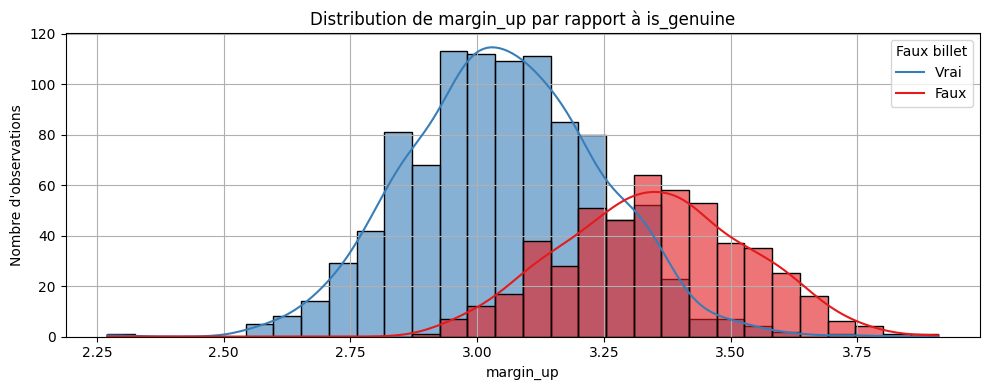

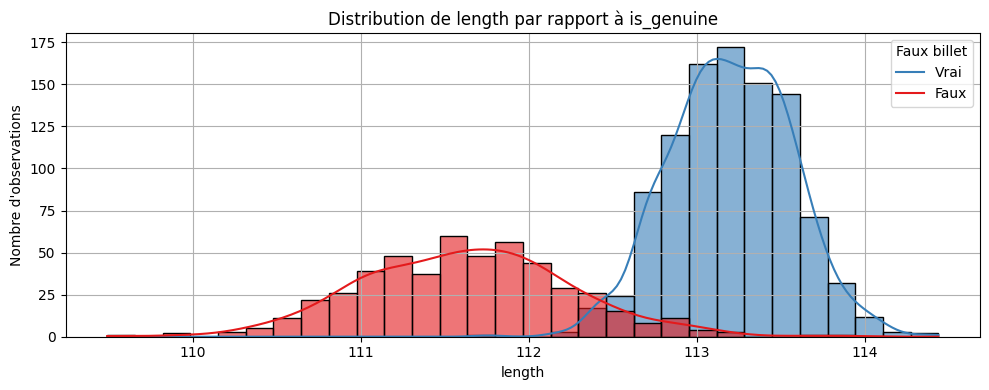

In [77]:


for colonne in colonnes:
    plt.figure(figsize=(10, 4))
    
    # Histogramme par classe
    sns.histplot(data=df, x=colonne, hue='is_genuine', kde=True, bins=30, palette='Set1', alpha=0.6)
    plt.title(f'Distribution de {colonne} par rapport à is_genuine')
    plt.xlabel(colonne)
    plt.ylabel("Nombre d'observations")
    plt.legend(title="Faux billet", labels=["Vrai", "Faux"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    



Les résultats de cette analyse bivariée permettent de remarquer d'importantes caractéristiques quant aux deux catégories de billets.
En effet,on note que les faux billets ont généralement un grand "margin_low" (plus de 5),un grand margin_up (>= 3.25) et un petit "length" comparé aux vrais billets .

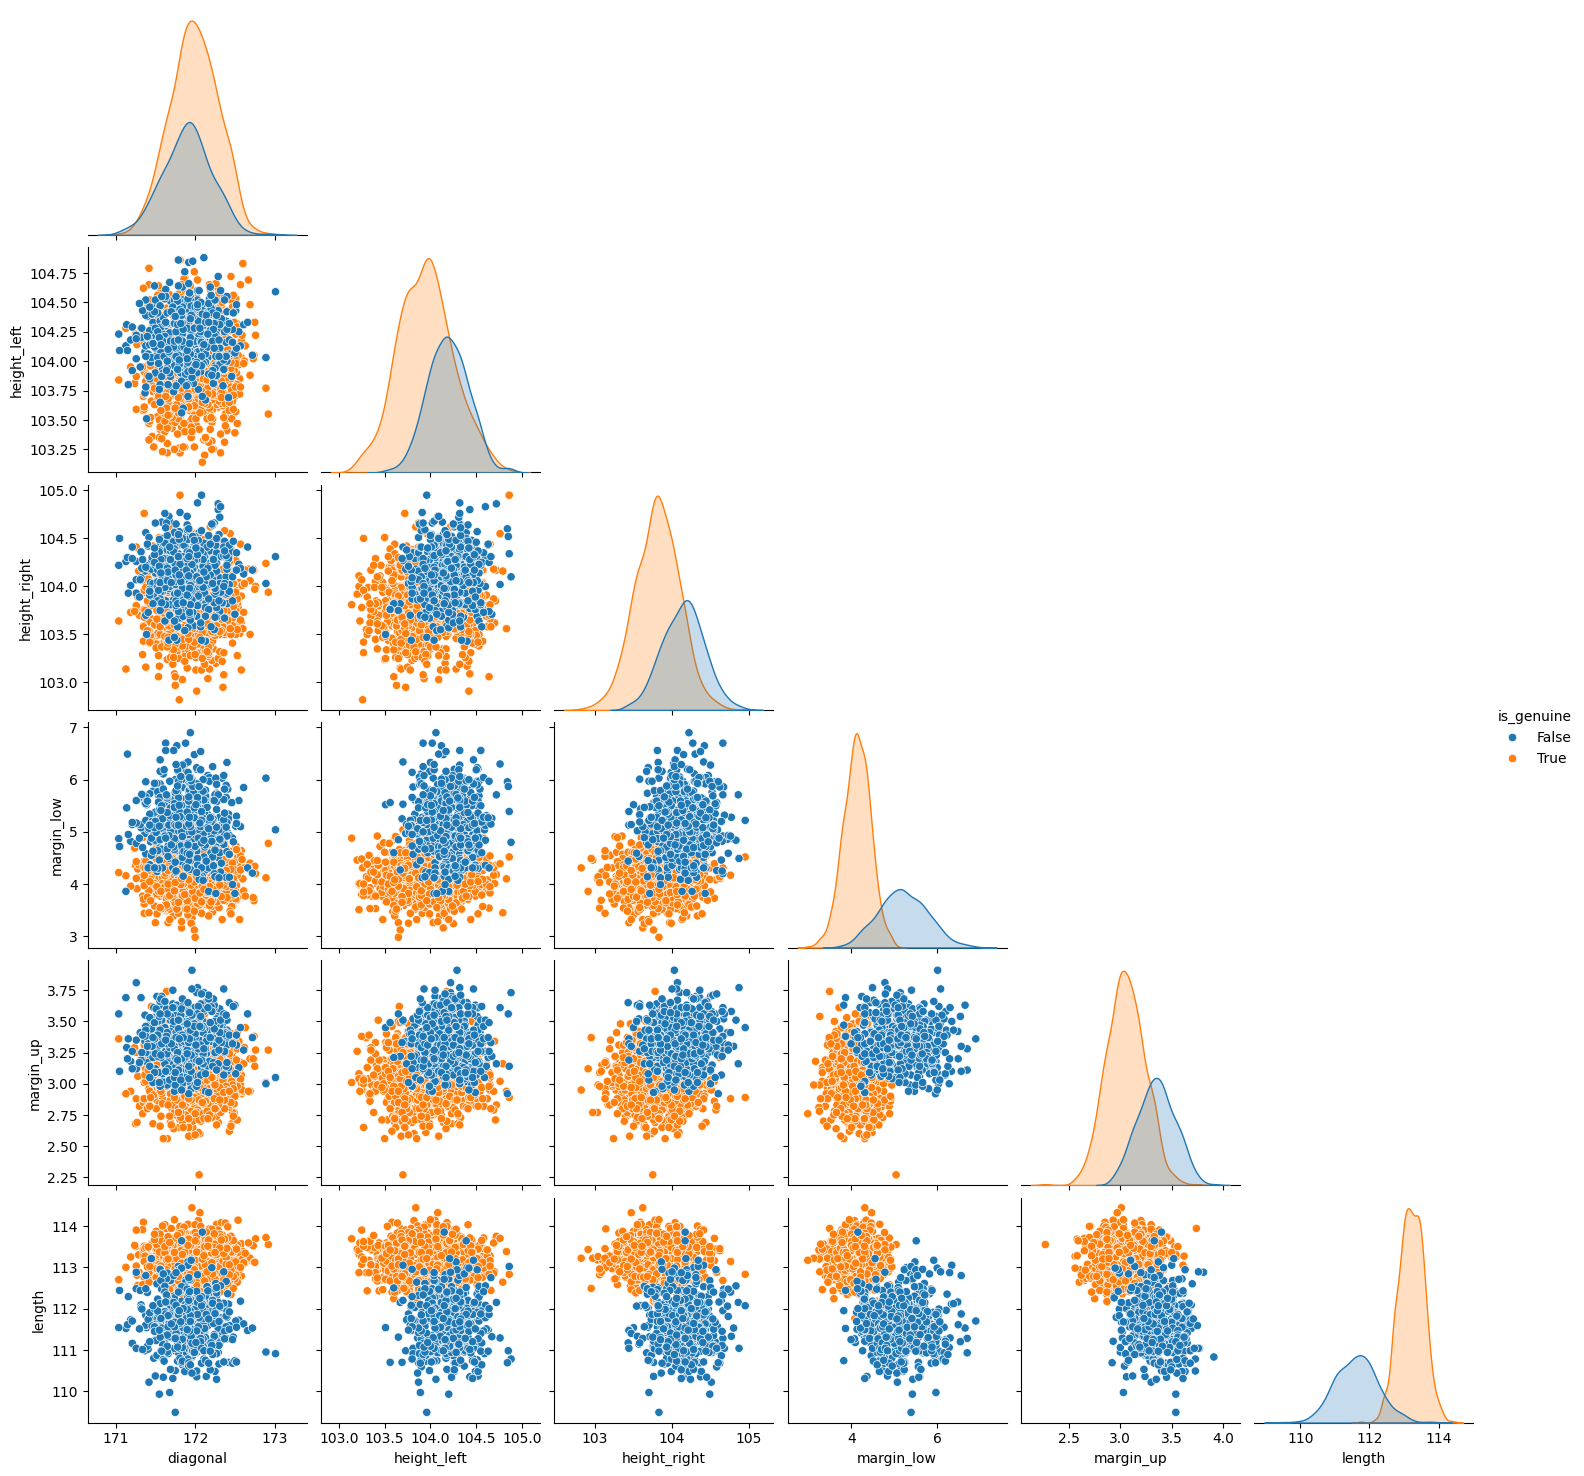

In [78]:
# Graphiques de paires

pp=sns.pairplot(df, hue='is_genuine', corner=True)


Ces graphiques de paires permettent de confirmer les résultats obtenus avec les histogrammes visualisés ci-haut.
Elles nous apportent des informations notamment sur les dimensions qui servent à mieux différencier les deux classes de billets.
On note donc que le "length" et le "margin_low" permettent de bien séparer les faux billets des vrais billets. Le "margin_up" et le "height_right" permettent également de distinguer plus ou moins les classes.


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Matrice de correlation</h3>
</div>

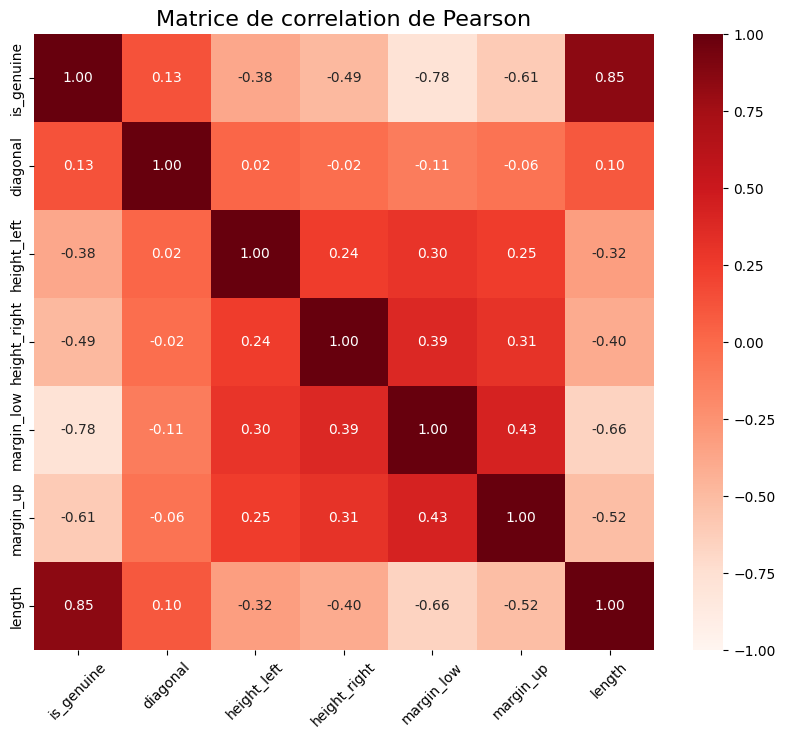

In [138]:
correlogram =df.corr()

# visualisation de la matrice de correlation

plt.figure(figsize=(10, 8))
sns.heatmap(correlogram,vmin = -1, vmax = 1,cmap = "Reds",annot = True, fmt = '.2f')
plt.title('Matrice de correlation de Pearson', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

L'analyse de la matrice de correlation permet de dire que les variables telles que  "length" et "margin_low" sont fortement liées à la variable cible "is_genuine".
Les variables "margin_up","height_right" et "height_left" ont une corelation moyenne négative avec la variable cible.
Quand à la variable "diagonale", elle est faiblement liée à la variable cible.
Cependant,on remarque que "length" et "margin_low" ont un coefficient de corelation de (-0,66)."length" est également correlée à "margin_low" avec un coefficient de (-0,52). Meme si les correlations ne sont pas trop fortes,une étude de la multicolinéarité est nécessaire.

In [81]:
#verification multicolinéarité 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_col = df.drop(columns =["is_genuine"])


X_mul = add_constant(df_col)  # Ajout de la constante

vif = pd.DataFrame()
vif["Variable"] = X_mul.columns
vif["VIF"] = [variance_inflation_factor(X_mul.values, i) for i in range(X_mul.shape[1])]
print(vif)


       Variable            VIF
0         const  593962.470531
1      diagonal       1.017664
2   height_left       1.156795
3  height_right       1.257707
4    margin_low       1.873956
5     margin_up       1.418534
6        length       2.107505


Aucun des coefficients Variance Inflation Factor (VIF) n'est proche de 5 ou supérieur à 5.
Donc on on conclut qu'il n'y a pas de cas de multicolinéarité.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Préparation des données</h2>
</div>

Après l'analyse des correlations  ,les variables explicatives à faible correlation  avec la variable cible comme "diagonal" seront enlevées  du dataset car elle n'apporte pas de précision .
Quand aux  variables restantes de la dataframe, les unes sont moyennement correlées à la variable cible :
'height_left' avec un coefficient de -0,38
height_right' avec un coefficient de -0.49
 les autres sont fortement correlées à cette dernière:
  'length' avec un coefficient de 0,85
  'margin_low' avec un coefficient de -0,78 
  'margin_up' avec un coefficient de -0,61 

Elles seront gardées pour une analyse approfondie pendant l'estimation des modèles

In [139]:

df_prediction = df.drop(columns = ["diagonal"]).copy()

In [83]:
df_prediction.head()

,is_genuine,height_left,height_right,margin_low,margin_up,length
0,True,104.86,104.95,4.52,2.89,112.83
1,True,103.36,103.66,3.77,2.99,113.09
2,True,104.48,103.50,4.40,2.94,113.16
3,True,103.91,103.94,3.62,3.01,113.51
4,True,104.28,103.46,4.04,3.48,112.54


In [140]:
X = df_prediction.drop(columns =["is_genuine"])
y = df_prediction["is_genuine"].astype(int)


In [141]:

X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.3,stratify =y,shuffle = True,random_state = 42 )

X_val, X_holdout, y_val, y_holdout = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Modélisation des données</h2>
</div>

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Regression logistique</h3>
</div>

In [86]:
# Estimation du modèle logistique

from sklearn.pipeline import Pipeline

pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('model', #LogisticRegression(solver = "liblinear",class_weight = "balanced",max_iter=1000)
     LogisticRegression(penalty="l1", solver="saga", max_iter=5000))
])


In [87]:
# Entrainement du modèle
pipeline_log.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Importance des variables dans la Regression logistique</h3>
</div>

In [88]:


#  Calcul feature importance 
log_reg_model = pipeline_log.named_steps["model"]

importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg_model.coef_[0],
    "Importance_abs": abs(log_reg_model.coef_[0])
}).sort_values(by="Importance_abs", ascending=False)

print(importance)



        Feature  Coefficient  Importance_abs
4        length     4.720157        4.720157
2    margin_low    -3.193230        3.193230
3     margin_up    -1.759387        1.759387
1  height_right    -0.811805        0.811805
0   height_left    -0.233799        0.233799


De l'annalyse de la matrice de l'importance des features , il ressort que les variables telles que height_right et height_left n'ont pas un grand poids sur la performance ou non du modèle.C'est à dire que leur absence ne réduit pas pour autant la performance que le  modèle avait en leur présence. Elles seront donc enlevées pour éviter tout overfitting ou tout bruit conduisant à des difficultés de généralisation du modèle ou à son instabilité .

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Variables explicatives finales du modèle logistique</h3>
</div>

In [89]:
X_train_final = X_train.drop(columns = ["height_left","height_right"])
X_val_final = X_val.drop(columns = ["height_left","height_right"])
X_holdout_final = X_holdout.drop(columns = ["height_left","height_right"])

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Entrainement optimale du modèle logistique</h3>
</div>

In [90]:
pipeline_log.fit(X_train_final,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0



<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Performances du modèle logistique sur les données d'entrainement</h3>
</div>

In [91]:
y_train_log_2= pipeline_log.predict(X_train_final)
y_train_proba_log_2 = pipeline_log.predict_proba(X_train_final)[:,1]
auc_roc_train = roc_auc_score(y_train,y_train_proba_log_2)
auc_train = accuracy_score(y_train,y_train_log_2)
rapport_classification_1 = classification_report(y_train,y_train_log_2)
matrice_confusion_1 = confusion_matrix(y_train,y_train_log_2)
print( "matrice de confusion:\n",matrice_confusion_1)
print( "\nrapport de classification :\n",rapport_classification_1)
print(auc_roc_train)
print(auc_train)

matrice de confusion:
 [[345   5]
 [  1 699]]

rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       350
           1       0.99      1.00      1.00       700

    accuracy                           0.99      1050
   macro avg       1.00      0.99      0.99      1050
weighted avg       0.99      0.99      0.99      1050

0.9978244897959184
0.9942857142857143



<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Performances du modèle logistique sur les données de validation</h3>
</div>

In [92]:
# Predictions

y_pred_log = pipeline_log.predict(X_val_final)
y_pred_proba_log = pipeline_log.predict_proba(X_val_final)[:,1]

In [93]:
# metrics

rapport_classification = classification_report(y_val,y_pred_log)
matrice_confusion = confusion_matrix(y_val,y_pred_log)
auc = accuracy_score(y_val,y_pred_log)
print( "matrice de confusion:\n",matrice_confusion)
print( "\nrapport de classification :\n",rapport_classification)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[ 72   3]
 [  1 149]]

rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.98      0.99      0.99       150

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225


accuracy :
 0.9822222222222222


Le rapport de classification montre que le modèle arrive à bien détecter les deux classes avec un recall de 0,97 pour la classe minoritaire "faux billets" et un recall de 0,99 pour la classe majoritaire "vrais billets".

In [94]:
#auc_roc
auc_roc_test= roc_auc_score(y_val,y_pred_proba_log)
print(auc_roc_test)

0.9987555555555556



<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Test de la performance du modèle logistique sur les données de pré-production</h3>
</div>

In [95]:
y_pred_log_1 = pipeline_log.predict(X_holdout_final)
y_pred_proba_log_1 = pipeline_log.predict_proba(X_holdout_final)[:,1]

rapport_classification = classification_report(y_holdout,y_pred_log_1)
matrice_confusion = confusion_matrix(y_holdout,y_pred_log_1)
auc = accuracy_score(y_holdout,y_pred_log_1)
auc_roc_hold= roc_auc_score(y_holdout,y_pred_proba_log_1)
print( "matrice de confusion:\n",matrice_confusion)
print( "\nrapport de classification :\n",rapport_classification)
print( "\naccuracy :\n",auc)
print(auc_roc_hold)

matrice de confusion:
 [[ 74   1]
 [  1 149]]

rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.99      0.99      0.99       150

    accuracy                           0.99       225
   macro avg       0.99      0.99      0.99       225
weighted avg       0.99      0.99      0.99       225


accuracy :
 0.9911111111111112
0.9994666666666667


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">KNeighborsClassifier</h3>
</div>

In [96]:
# Model KNN 

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors = 5)
)])

In [97]:
# Entrainement du model KNN
pipeline_knn.fit(X_train_final,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [98]:
y_pred_knn = pipeline_knn.predict(X_val_final)
y_pred_proba_knn = pipeline_knn.predict_proba(X_val_final)

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Analyse de la performance du modèle KNN sur les données de validation</h3>
</div>

In [99]:
# Métriques
rapport_classification_knn = classification_report(y_val,y_pred_knn)
matrice_confusion_knn = confusion_matrix(y_val,y_pred_knn)
auc = accuracy_score(y_val,y_pred_knn)
print( "matrice de confusion:\n",matrice_confusion_knn)
print( "\nrapport de classificatiion :\n",rapport_classification_knn)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[ 72   3]
 [  1 149]]

rapport de classificatiion :
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.98      0.99      0.99       150

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225


accuracy :
 0.9822222222222222


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Test de la performance du modèle KNN sur les données de pré-production</h3>
</div>

In [100]:
y_pred_knn_out = pipeline_knn.predict(X_holdout_final)
y_pred_proba_knn_out = pipeline_knn.predict_proba(X_holdout_final)
rapport_classification_knn = classification_report(y_holdout,y_pred_knn_out)
matrice_confusion_knn = confusion_matrix(y_holdout,y_pred_knn_out)
auc = accuracy_score(y_holdout,y_pred_knn_out)
print( "matrice de confusion:\n",matrice_confusion_knn)
print( "\nrapport de classificatiion :\n",rapport_classification_knn)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[ 74   1]
 [  2 148]]

rapport de classificatiion :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.99      0.99      0.99       150

    accuracy                           0.99       225
   macro avg       0.98      0.99      0.99       225
weighted avg       0.99      0.99      0.99       225


accuracy :
 0.9866666666666667


Les coefficients ne sont pas stables

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Modèle KMeans</h3>
</div>

In [101]:
X_final = df.drop(columns=["is_genuine","height_left","height_right"])
X_kmeans = X_final.copy()


X_kmeans .head()

,diagonal,margin_low,margin_up,length
0,171.81,4.52,2.89,112.83
1,171.46,3.77,2.99,113.09
2,172.69,4.40,2.94,113.16
3,171.36,3.62,3.01,113.51
4,171.73,4.04,3.48,112.54


In [102]:
# Model KMeans
pipeline_kmean = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(n_clusters = 2,random_state = 42)
)])

In [116]:
# Entrainement du model KMeans
pipeline_kmean.fit(X_train_final)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [119]:
# Prediction des clusters
y_clusters = pipeline_kmean.predict(X_val_final)

In [121]:
# mapping des clusters aux vraies classes

from scipy.stats import mode

labels = np.zeros_like(y_clusters)
for i in range(2):  
    mask = (y_clusters == i)
    labels[mask] = mode(y_val[mask], keepdims=True).mode[0]

accuracy = accuracy_score(y_val,labels)

# Matrice de confusion et rapport de classification
print("Matrice de confusion :")
print(confusion_matrix(y_val, labels))

print("\nClassification report :")
print(classification_report(y_val, labels))
print(accuracy)

Matrice de confusion :
[[ 71   4]
 [  1 149]]

Classification report :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.97      0.99      0.98       150

    accuracy                           0.98       225
   macro avg       0.98      0.97      0.97       225
weighted avg       0.98      0.98      0.98       225

0.9777777777777777


In [106]:
"""import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction en 2D pour visualiser
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

# Clusters prédits
#y_clusters = pipeline_kmean.predict(X_final)

# Affichage des clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_clusters, cmap='viridis', alpha=0.7)
plt.title("Nuage de points des clusters (KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

"""

'import matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\n\n# Réduction en 2D pour visualiser\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(X_final)\n\n# Clusters prédits\n#y_clusters = pipeline_kmean.predict(X_final)\n\n# Affichage des clusters\nplt.figure(figsize=(8,6))\nplt.scatter(X_pca[:,0], X_pca[:,1], c=y_clusters, cmap=\'viridis\', alpha=0.7)\nplt.title("Nuage de points des clusters (KMeans)")\nplt.xlabel("PCA 1")\nplt.ylabel("PCA 2")\nplt.colorbar(label="Cluster")\nplt.show()\n\n'

In [124]:
from sklearn.metrics import silhouette_score


# Calcul du silhouette score
sil_score = silhouette_score(X_val, y_clusters)
print(f"Silhouette Score : {sil_score:.4f}")


Silhouette Score : 0.5392


Le silhouette score étant égal à 0,5 , on en déduit que le clustering est moyen.

/var/folders/fj/j3p8gj7x435dp_mvdjn475ym0000gn/T/ipykernel_11866/2284622044.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


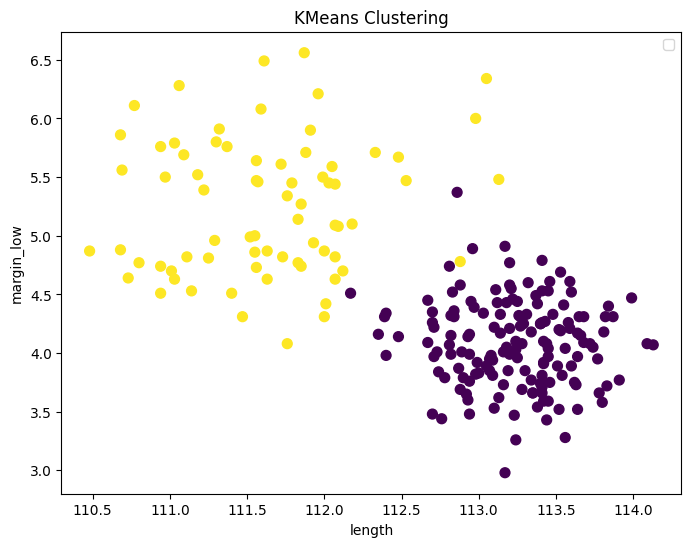

In [126]:

# Prédiction des clusters
#clusters = pipeline_kmean.predict(X_kmeans )

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_val["length"], X_val["margin_low"], c=y_clusters, cmap='viridis', s=50)

# Récupération des centres
#centers = pipeline_kmean.named_steps['model'].cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel("length")
plt.ylabel("margin_low")
plt.title("KMeans Clustering")
plt.legend()
plt.show()


L'analyse de ce graphique permet de dire que le modèle KMeans n'arrive pas à du tout bien séparer ou distinguer les classes

L'analyse de ces résultats montre que le KMeans nest pas performant sur les données.

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Modèle Random Forest</h3>
</div>

Random forest

In [33]:

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators =100,
                                  class_weight = "balanced",
                                  random_state = 42)
)])

In [36]:
# Entrainement

pipeline_rf.fit(X_train_final,y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [38]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Random Forest
rf = pipeline_rf.named_steps["model"]


# Importance des features
importance_rf = pd.DataFrame({
    "Feature": X_train_final.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance_rf)


      Feature  Importance
2      length    0.439541
0  margin_low    0.370352
1   margin_up    0.190107


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Test de la performance du modèle Random Forest sur les données de validation</h3>
</div>

In [39]:
# Predictions

y_pred_rf = pipeline_rf.predict(X_val_final)
y_pred_proba_rf = pipeline_rf.predict_proba(X_val_final)

In [40]:
# Analyse de la performance du modèle Random Forest

rapport_classificatiion_rf = classification_report(y_val,y_pred_rf)
matrice_confusion_rf = confusion_matrix(y_val,y_pred_rf)
auc = accuracy_score(y_val,y_pred_rf)
print( "matrice de confusion:\n",matrice_confusion_rf)
print( "\nrapport de classificatiion :\n",rapport_classificatiion_rf)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[ 72   3]
 [  2 148]]

rapport de classificatiion :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.98      0.99      0.98       150

    accuracy                           0.98       225
   macro avg       0.98      0.97      0.97       225
weighted avg       0.98      0.98      0.98       225


accuracy :
 0.9777777777777777


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Test de la performance du modèle Random Forest sur les données de pré-production</h3>
</div>

In [111]:
y_pred_rf_1 = pipeline_rf.predict(X_holdout_final)
y_pred_proba_rf = pipeline_rf.predict_proba(X_holdout_final)[:,1]
rapport_classificatiion_rf_1 = classification_report(y_holdout,y_pred_rf_1)
matrice_confusion_rf_1 = confusion_matrix(y_holdout,y_pred_rf_1)
auc_1 = accuracy_score(y_holdout,y_pred_rf_1)
auc_roc_rf = roc_auc_score(y_holdout,y_pred_proba_rf)
print( "matrice de confusion:\n",matrice_confusion_rf)
print( "\nrapport de classificatiion :\n",rapport_classificatiion_rf)
print( "\naccuracy :\n",auc)
print( "\nauc_roc:\n",auc_roc_rf)

matrice de confusion:
 [[ 72   3]
 [  2 148]]

rapport de classificatiion :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.98      0.99      0.98       150

    accuracy                           0.98       225
   macro avg       0.98      0.97      0.97       225
weighted avg       0.98      0.98      0.98       225


accuracy :
 0.9866666666666667

auc_roc:
 0.9995555555555555


Le modèle Random Forest est  stable. En effet ,lorsqu'on passe des donnnées de validation aux données de pré-production,
tous les critères de performance que ce soit les coefficients de la matrice de confusion ou ceux du rapport de classification. 

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Analyse comparative des modèles estimés</h2>
</div>


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Comparaison Classification report et auc</h3>
</div>

L'analyse des rapports de classifications met en exergue 

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Comparaison Matrices de confusion</h3>
</div>

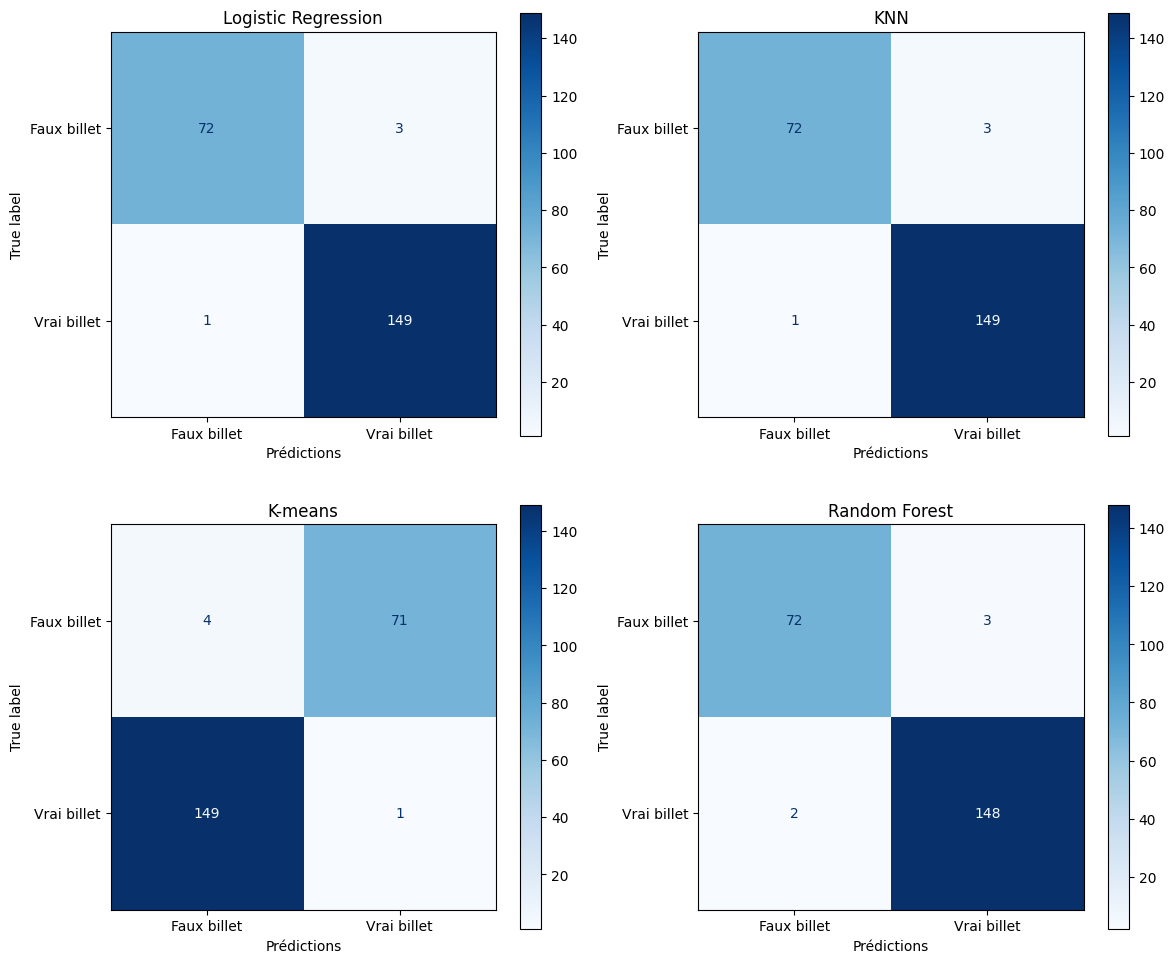

In [130]:


from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": y_pred_log,
    "KNN": y_pred_knn,
    "K-means": y_clusters,
    "Random Forest": y_pred_rf,
}


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


for i, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Faux billet", "Vrai billet"])
    disp.plot(ax=axes[i], cmap="Blues", values_format='d')
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Prédictions")


plt.tight_layout()
plt.show()


L'analyse des différents AUC montre que les modéles les plus performants sont :la regression logistique,le KnearestKNeighbors et le Random forest avec des scores respectifs de 0.9155, 0.92 ,0.9177.
Le KNN semble donc globalement plus performant,mais il fait plus d'erreurs à prédire les faux billets comparé aux autres modèles.
 Cependant,étant dans une logique de détection de faux billets,l'objectif principal est de réduire le nombre de faux positifs notamment de faux billets identifiés comme des vrais billets. 
Le modèle qui minimise le mieux ce risque  parmi les modèles estimés plus haut est le modle logistique avec un taux de faux Positifs de

In [131]:
#AUC model logistic
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, seuils = roc_curve(y_val, y_pred_proba_log[:,1])
auc = roc_auc_score(y_val, y_pred_proba_log[:,1])

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Hasard")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Analyse de la robustesse du modèle logistique </h3>
</div>


In [147]:

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score




# Nombre de folds
cv_log= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utiliser AUC comme métrique
auc_scores = cross_val_score(
    pipeline_log,
    X,
    y,
    cv=cv_log,
    #scoring='roc_auc'
    scoring ='f1'
)

print("AUC pour chaque fold :", auc_scores)
print("AUC moyenne (CV) :", np.mean(auc_scores))


AUC pour chaque fold : [0.99004975 0.98759305 0.98753117 0.99749373 0.98759305]
AUC moyenne (CV) : 0.9900521523735618


In [156]:

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score




# Nombre de folds
cv_log= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utiliser AUC comme métrique
f1_score = cross_val_score(
    pipeline_rf,
    X,
    y,
    cv=cv_log,
    scoring='f1'
)

print("AUC pour chaque fold :", f1_score)
print("f1 moyenne (CV) :",np.mean(f1_score ))




AUC pour chaque fold : [0.9924812  0.9924812  0.98759305 1.         0.99004975]
f1 moyenne (CV) : 0.9925210418735999


In [115]:


from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score



# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Définir les métriques F1 par classe
scoring = {
    'f1_class_0': make_scorer(f1_score, labels=[0], average='binary'),
    'f1_class_1': make_scorer(f1_score, labels=[1], average='binary')
}

# Cross-validation
cv_results = cross_validate(pipeline_rf, X, y, cv=cv, scoring=scoring)

print("F1-score classe 0 par fold :", cv_results['test_f1_class_0'])
print("F1-score classe 1 par fold :", cv_results['test_f1_class_1'])
print("Moyenne F1 classe 0 :", cv_results['test_f1_class_0'].mean())
print("Moyenne F1 classe 1 :", cv_results['test_f1_class_1'].mean())


F1-score classe 0 par fold : [0.9924812  0.9924812  0.98759305 1.         0.99004975]
F1-score classe 1 par fold : [0.9924812  0.9924812  0.98759305 1.         0.99004975]
Moyenne F1 classe 0 : 0.9925210418735999
Moyenne F1 classe 1 : 0.9925210418735999


Les résultats ci-dessus montrent que le modèle est encore plus performant sur les folds que sur les trains.On en déduit que c'est un modèle robuste et un candidat parfait pour la production.

In [89]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import numpy as np



# KFold avec 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

# Boucle manuelle
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\nFold {fold+1}")
    
    # Séparer train et validation
    X_train_1, X_val_1 = X_final.iloc[train_idx], X_final.iloc[val_idx]
    y_train_1, y_val_1 = y.iloc[train_idx], y.iloc[val_idx]
    
    # Entraînement
    pipeline_rf.fit(X_train_1, y_train_1)
    
    # Prédiction
    y_pred_fold = pipeline_rf.predict_proba(X_val_1)[:, 1]  # proba pour roc_auc
    
    # Score
    score = roc_auc_score(y_val_1, y_pred_fold)
    scores.append(score)
    
    print(f"Score fold {fold+1} : {score:.4f}")

print("\nScores par fold :", scores)
print("Moyenne des scores :", np.mean(scores))



Fold 1
Score fold 1 : 0.9998

Fold 2
Score fold 2 : 0.9994

Fold 3
Score fold 3 : 0.9997

Fold 4
Score fold 4 : 0.9990

Fold 5
Score fold 5 : 0.9986

Scores par fold : [0.9997846889952153, 0.9994443321883208, 0.9996804941690186, 0.9990351629502572, 0.9986133960047003]
Moyenne des scores : 0.9993116148615023


La cross validation permet de ..

In [132]:



# Exemple : dictionnaire de modèles
model_results = {
    "Logistic Regression": y_pred_proba_log,
      "KNN": y_pred_proba_knn,
    "Random Forest": y_pred_proba_rf,
  
}

# Tracer les courbes
plt.figure(figsize=(8, 6))

for name, y_proba in model_results.items():
    fpr, tpr, _ = roc_curve(y_val, y_proba[:,1])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Comparaison des courbes ROC ")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Passage nouvelles données</h3>
</div>

In [133]:


def evaluer_modele_csv(data, pipeline):
    """
    Applique un pipeline entraîné sur un fichier CSV ou un DataFrame.
    
    Paramètres :
    - data : str (chemin CSV) ou pd.DataFrame
    - pipeline_log : pipeline entraîné (ex: scaler + modèle)

    Retour :
    - DataFrame avec les colonnes initiales + 'prediction' + 'probabilités'
    """
    
    # Charger les données si c'est un chemin
    if isinstance(data, str):
        df = pd.read_csv(data)
    else:
        df = data.copy()

    colonnes_entree = ["length","margin_low","margin_up"]


    # Vérification des colonnes disponibles
    colonnes_disponibles = [col for col in colonnes_entree if col in df.columns]
    
    # Compléter les features manquantes si besoin
    for col in colonnes_entree:
        if col not in df.columns:
            df[col] = 0  

    # Traitement des valeurs manquantes
    if "margin_low" in df.columns:
        df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())

    # Prédictions
    X = df[colonnes_entree]
    df["prediction"] = pipeline_rf.predict(X)
    df["probabilités_1"] = pipeline_rf.predict_proba(X)[:, 1]
    df["probabilités_0"] = pipeline_rf.predict_proba(X)[:, 0]
    df["probabilités_1"] =df["probabilités_1"] .round(2)
    df["probabilités_0"] =df["probabilités_0"] .round(2)
    #roc_auc = roc_auc_score(df["is_genuine"], df["probabilités"])
    
    return df


In [134]:
#nouvelle_donnee
data_nw = pd.DataFrame({
    "diagonal": [174.6,170.3],
    "height_left": [108.6,99.76],
     "height_right": [103.1,100.6],
    "margin_low": [8,1.2],   
    "margin_up": [3,1.76],
    "length": [110,103.5]
})
data_nw.drop(columns = ["diagonal","height_left","height_right"],inplace = True)


pred_nw = pipeline_rf.predict(data_nw)
pred_poba_nw = pipeline_rf.predict_proba(data_nw)
data_nw["probabilités_0"] = pred_poba_nw[:,0]
data_nw["probabilités_1"] = pred_poba_nw[:,1]
data_nw["predictions"] = pred_nw 
print(data_nw)
pred_nw 

   margin_low  margin_up  length  probabilités_0  probabilités_1  predictions
0         8.0       3.00   110.0             1.0             0.0            0
1         1.2       1.76   103.5             0.5             0.5            0


array([0, 0])

In [84]:
evaluer_modele_csv(data_nw, pipeline_log = pipeline_log)

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,probabilités_1,probabilités_0
0,174.6,108.60,103.1,8.0,3.00,114.0,1,1.0,0.0
1,170.3,99.76,100.6,1.2,1.76,103.5,0,0.0,1.0


In [137]:


data_n = pd.DataFrame({
    "diagonal": [174.6, 169.2, 182.1, 160.4, 177.8, 185.3, 172.9, 168.7, 180.5, 176.0],
    "height_left": [108.6, 104.2, 112.8, 99.7, 110.3, 115.6, 106.4, 102.9, 113.2, 109.5],
    "height_right": [109, 105, 113, 100, 111, 116, 107, 103, 114, 110],  # nouvelle colonne
    "margin_low": [8, 10, 6, 9, 7, 8, 11, 10, 7, 6],
    "margin_up": [3, 4, 5, 2, 3, 4, 5, 3, 2, 4],
    "length": [114, 110, 118, 107, 115, 120, 111, 109, 117, 113]
})

data_n.drop(columns = ["diagonal","height_left","height_right"],inplace = True)
pred_n = pipeline_rf.predict(data_n)
pred_poba_n = pipeline_rf.predict_proba(data_n)
data_n["probabilités_0"] = pred_poba_n[:,0].round(2)
data_n["probabilités_1"] = pred_poba_n[:,1].round(2)
data_n["predictions"] = pred_n
print(data_n)
pred_n
#evaluer_modele_csv(data_n, pipeline_log = pipeline_log)

   margin_low  margin_up  length  probabilités_0  probabilités_1  predictions
0           8          3     114            0.58            0.42            0
1          10          4     110            1.00            0.00            0
2           6          5     118            0.71            0.29            0
3           9          2     107            0.52            0.48            0
4           7          3     115            0.58            0.42            0
5           8          4     120            0.71            0.29            0
6          11          5     111            1.00            0.00            0
7          10          3     109            1.00            0.00            0
8           7          2     117            0.45            0.55            1
9           6          4     113            0.91            0.09            0


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [136]:
data_n.head()

,margin_low,margin_up,length,probabilités_0,probabilités_1,predictions
0,8,3,114,0.58,0.42,0
1,10,4,110,1.00,0.00,0
2,6,5,118,0.71,0.29,0
3,9,2,107,0.52,0.48,0
4,7,3,115,0.58,0.42,0


In [160]:
#data_n.drop(columns = ["diagonal","height_left","height_right"],inplace = True)
pred_nlog = pipeline_log.predict(data_n)
pred_proba_nlog = pipeline_log.predict_proba(data_n)
data_n["probabilités_0"] = pred_proba_nlog[:,0]
data_n["probabilités_1"] = pred_proba_nlog[:,1]
data_n["predictions"] = pred_nlog
print(data_n)
pred_nlog

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- predictions
- probabilités_0
- probabilités_1


In [108]:
print(pd.concat([X_val_final.head(10), y_val.head(10)], axis=1))

      margin_low  margin_up  length  is_genuine
708         4.08       2.98  113.28           1
663         3.73       3.12  113.63           1
786         3.87       3.39  112.87           1
144         3.79       3.12  112.78           1
1087        5.48       3.37  113.13           0
166         4.43       2.86  113.18           1
132         4.61       2.99  113.59           1
713         4.41       2.66  113.55           1
1236        5.10       3.45  112.18           0
189         4.17       3.49  113.64           1


In [153]:
new_data.to_csv("new_data.csv", index=False, sep=";")

In [125]:
df_new_data1 = new_data1.copy()
df_new_data1 ["predictions"] = predict_x
df_new_data1 ["Probabilites predictions"] = prdict_prob[:,1]
auc1 = accuracy_score(y_val.sample(10,random_state=42),predict_x)
roc_auc1 = roc_auc_score(y_val.sample(10,random_state=42),predict_x)
print(df_new_data1)

print(f"auc : {auc1}")
print(f"roc_auc : {roc_auc1}")

      margin_low  margin_up  length  predictions  Probabilites predictions
189         4.17       3.49  113.64            1                      0.95
1448        5.47       3.28  111.56            0                      0.01
1379        5.47       3.37  112.53            0                      0.01
957         4.18       2.99  113.81            1                      1.00
913         4.39       3.32  112.97            1                      0.98
176         4.46       2.77  113.22            1                      1.00
738         3.89       3.03  113.60            1                      1.00
824         4.49       3.25  113.37            1                      1.00
364         3.62       2.99  113.13            1                      1.00
697         4.52       3.09  113.60            1                      1.00
auc : 1.0
roc_auc : 1.0


In [127]:
"""nouvelle_data = pd.read_csv("nouvelle_donnee.csv", sep=";")
nouvelle_data  = nouvelle_data.drop(columns = ["diagonal","length","margin_up","height_left","is_genuine"])
predict_x_n= pipeline_log.predict(nouvelle_data)
print(predict_x)
#print(y.head(10))
prdict_prob_n = pipeline_log.predict_proba(nouvelle_data)
#print(prdict_prob[:,1] )
"""

[1 1 0 0 1 0 0 1 1 0]


In [128]:
"""df_nouvelle_donnee = nouvelle_data.copy()
df_nouvelle_donnee ["predictions"] = predict_x
df_nouvelle_donnee ["Probabilites predictions"] = prdict_prob[:,1]
auc1 = accuracy_score(y_test.head(10),predict_x_n)
roc_auc1 = roc_auc_score(y_test.head(10),predict_x_n)
print(df_nouvelle_donnee)

print(f"auc : {auc1}")
print(f"roc_auc : {roc_auc1}")
"""

   height_right  margin_low  predictions  Probabilites predictions
0         44.12        1.39            1              1.000000e+00
1         35.78       11.55            1              1.000000e+00
2        111.33        9.04            0              1.158823e-22
3        233.57       16.11            0             7.008697e-231
4         73.54        2.77            1              1.000000e+00
5        120.74        6.33            0              3.962241e-31
6        114.04       22.41            0              5.517456e-58
7         93.99        0.43            1              1.000000e+00
8         11.88       14.44            1              1.000000e+00
9        193.41        2.88            0             3.978829e-137
auc : 0.5
roc_auc : 0.5


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Sauvegarde du modèle Random Forest</h3>
</div>


In [137]:
import joblib

joblib.dump(pipeline_rf, "model_detection_faux_billets.pkl")


['model_detection_faux_billets.pkl']

In [57]:
new_data.to_csv("new_data.csv")